# Loan Eligibility Prediction

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History, and others.


### What's been done in this notebook:

1. dropping irrelevant columns (Loan_ID and Loan_Amount_Term)
2. filling missing values
3. removing outliers
4. encoding categorical variables
5. Normalizing numerical variables
6. Data Visualization
7. Handling imbalanced data
8. removing skewness
9. saving preprocessed data


In [1]:
# importing libraries

import pandas as pd
import seaborn as sns


In [34]:
# import data CSV

df = pd.read_csv('data/data.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
# pring number of rows and columns

original_shape = df.shape

print('Number of rows: ', original_shape[0])
print('Number of columns: ', original_shape[1])

Number of rows:  614
Number of columns:  13


### About the features
```text
Loan_ID --> Unique id for every loan request
Gender --> Applicant's Gender
Married --> Applicant's Marital status
Dependents --> How many people are dependent on the Applicant in his/her family.
Education --> Applicant's Education
Self_Employed --> Whether the applicant is employed | Owner of business
ApplicantIncome --> Applicant's Income on record
CoapplicantIncome --> CoApplicant's Income on record
LoanAmount --> Amount of Loan required
Loan_Amount_Term --> Duration in which applicant wants to pay back the loan amount.
Credit_History --> Whether the candidate has good or bad credit history in past
Property_Area --> Type of locality of property which the candidate has given as mortgage. The type tells us about property valuation.
```

### About the target
```text
Loan_Status --> Whether the loan was approved or not
```


In [36]:
# droping Loan_ID column because it is not important

df.drop('Loan_ID', axis=1, inplace=True)


In [37]:
# checking for duplicates

df.duplicated().sum()


0

In [38]:
# checking for null values

df.isnull().sum()


Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [39]:
# Dealing with null values

##########################################################################################
# HOW the null values will be dealt with is written in the comments just above it's code #
##########################################################################################

df.dropna(subset=['Gender'], inplace=True) # Can't fill null values for Gender, so we drop them

# for missing values in Married, we fill with Yes if Dependents is not 0, and No if Dependents is 0
df.loc[(df['Married'].isnull()) & (df['Dependents'] != '0'), 'Married'] = 'Yes'
df.loc[(df['Married'].isnull()) & (df['Dependents'] == '0'), 'Married'] = 'No'

# for missing values in dependents, we fill with 0 is Married is No, and 1 if Married is Yes
df.loc[(df['Dependents'].isnull()) & (df['Married'] == 'No'), 'Dependents'] = '0'
df.loc[(df['Dependents'].isnull()) & (df['Married'] == 'Yes'), 'Dependents'] = '1'

# for missing values in Education, we will drop them
df.dropna(subset=['Education'], inplace=True)

# for missing values in Self_Employed, we fill with mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# for missing values in ApplicantIncome, we fill with median, since it's not afected by outliers
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)

# for missing values in CoapplicantIncome, we fill with median, since it's not afected by outliers
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median(), inplace=True)

# for missing values in LoanAmount, we fill with median, since it's not afected by outliers
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# for missing values in Loan_Amount_Term, we fill with median, since it's not afected by outliers
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# for missing values in Credit_History, we fill with mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# dropping other null values
df.dropna(inplace=True)


In [42]:
# print number of rows

print("Number of rows before dealing with missing values: ", original_shape[0])
print('Number of rows after dealing with missing values: ', df.shape[0])
print("Affected rows: ", original_shape[0] - df.shape[0])


Number of rows before dealing with missing values:  614
Number of rows after dealing with missing values:  598
Affected rows:  16


In [43]:
# checking for null values again

df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

In [44]:
# Checking data types

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    float64
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), object(7)
memory usage: 60.7+ KB


In [45]:
# changing data types to numeric using LabelEncoder

import sklearn.preprocessing as pp

le = pp.LabelEncoder()

# encoding all columns with object data type
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,127.0,360.0,1.0,2,1
1,1,1,1,0,0,3806.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [46]:
# checking data statistics

df.describe()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.812709,0.648829,0.749164,0.222408,0.128763,5300.240803,1620.115251,144.172241,342.341137,0.856187,1.035117,0.687291
std,0.390472,0.477736,0.996119,0.416212,0.335217,5810.057539,2953.141323,81.137570,64.867891,0.351193,0.787531,0.463985
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2883.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3806.000000,1128.500000,127.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5771.500000,2305.000000,162.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000,2.000000,1.000000


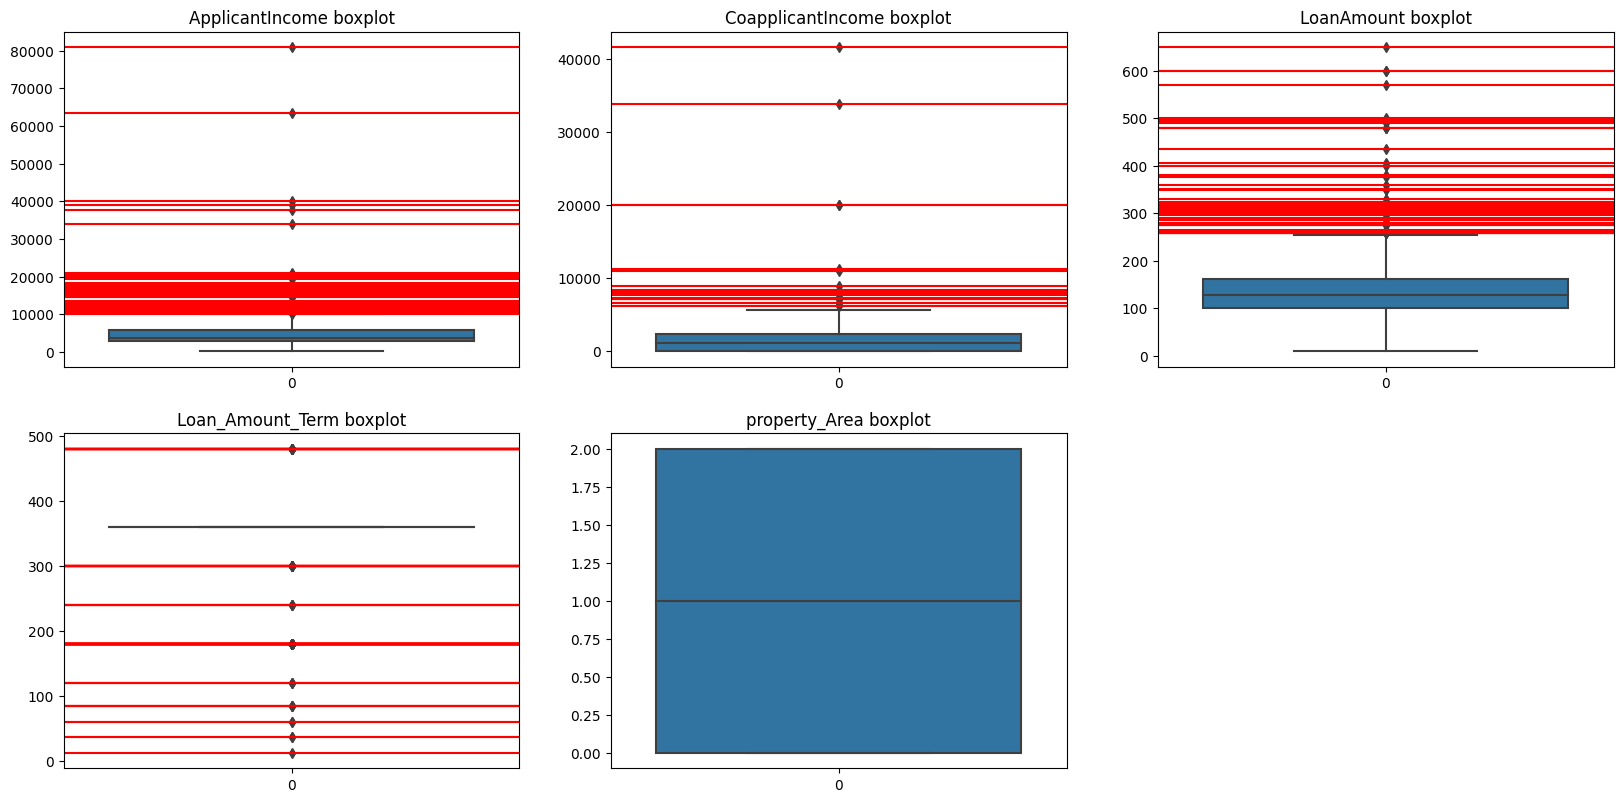

In [47]:
# checking for outliers

import matplotlib.pyplot as plt


# adding red color to outliers
def red_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    iqr = q3 - q1 # Interquartile range
    
    fence_low = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr

    outliers = data.loc[(data[column] < fence_low) | (data[column] > fence_high)]

    return outliers

def plot_ouutliers():
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'property_Area']]):
        plt.subplot(4, 3, i+1)
        sns.boxplot(df[col])
        
        # adding red color to outliers
        outliers = red_outliers(df, col)
        for outlier in outliers[col]:
            plt.axhline(outlier, color='r')
        
        plt.title(col + ' boxplot')

    plt.show()

plot_ouutliers()


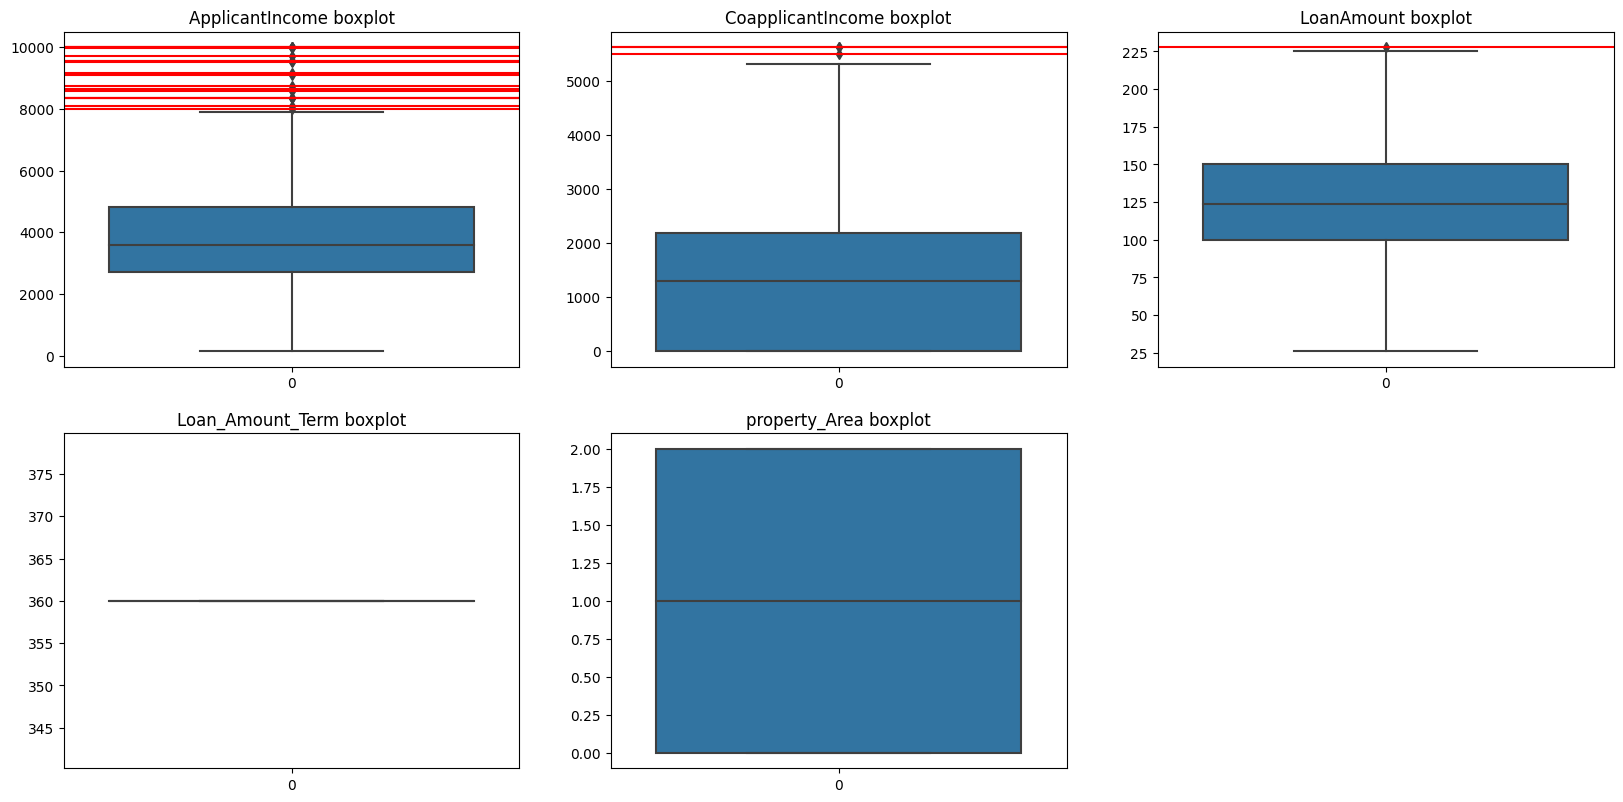

In [48]:
# removing outliers

df = df[~df['ApplicantIncome'].isin(red_outliers(df, 'ApplicantIncome')['ApplicantIncome'])]
df = df[~df['CoapplicantIncome'].isin(red_outliers(df, 'CoapplicantIncome')['CoapplicantIncome'])]
df = df[~df['LoanAmount'].isin(red_outliers(df, 'LoanAmount')['LoanAmount'])]
df = df[~df['Loan_Amount_Term'].isin(red_outliers(df, 'Loan_Amount_Term')['Loan_Amount_Term'])]
df = df[~df['property_Area'].isin(red_outliers(df, 'property_Area')['property_Area'])]

plot_ouutliers() # checking outliers again


In [59]:
# Affected rows information

print("Number of rows in original dataset: ", original_shape[0])
print('Number of rows after removing outliers and missing values: ', df.shape[0])
print("Overall Affected rows: ", original_shape[0] - df.shape[0])


Number of rows in original dataset:  614
Number of rows after removing outliers and missing values:  434
Overall Affected rows:  180


In [60]:
# checking data statistics again

df.describe()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.0,434.000000,434.000000,434.000000
mean,0.797235,0.633641,0.686636,0.239631,0.108295,0.389336,0.231903,0.488548,0.0,0.864055,0.974654,0.716590
std,0.402523,0.482365,0.967584,0.427351,0.311111,0.179294,0.242670,0.192241,0.0,0.343125,0.784847,0.451174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.261066,0.000000,0.366337,0.0,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.350152,0.229956,0.485149,0.0,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.474213,0.388089,0.613861,0.0,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,2.000000,1.000000


In [61]:
# Normalizing data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1,0,0,0,0,0.578579,0.000000,0.500000,0.0,1.0,2,1
1,1,1,1,0,0,0.371168,0.268089,0.504950,0.0,1.0,0,0
2,1,1,0,0,1,0.289340,0.000000,0.198020,0.0,1.0,2,1
3,1,1,0,1,0,0.247005,0.419200,0.465347,0.0,1.0,2,1
4,1,0,0,0,0,0.593909,0.000000,0.569307,0.0,1.0,2,1


Text(0.5, 1.0, 'Gender')

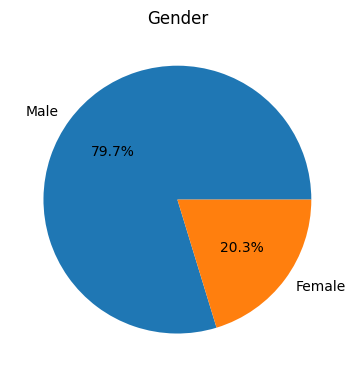

In [62]:
# plotting data for better understanding, visualizing data

plt.figure(figsize=(20, 20))

# pie chart for Gender
plt.subplot(4, 3, 1)
plt.pie(df['Gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title("Gender")


Text(0.5, 1.0, 'Married')

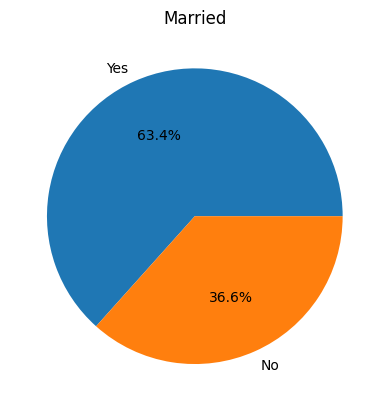

In [63]:
# pie chart for Married

plt.pie(df['Married'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title("Married")


Text(0.5, 1.0, 'Dependents pie chart')

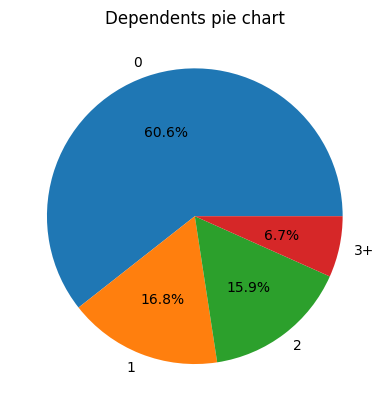

In [64]:
# pie chart for Dependents

plt.pie(df['Dependents'].value_counts(), labels=['0', '1', '2', '3+'], autopct='%1.1f%%')
plt.title("Dependents pie chart")


Text(0.5, 1.0, 'Education')

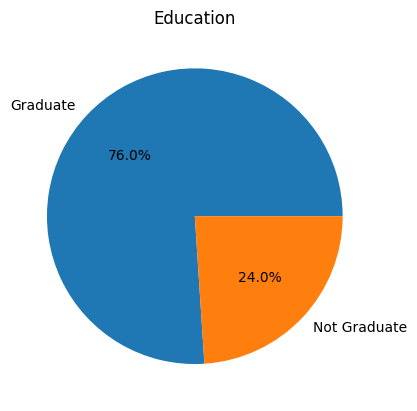

In [65]:
# pie chart for Education

plt.pie(df['Education'].value_counts(), labels=['Graduate', 'Not Graduate'], autopct='%1.1f%%')
plt.title("Education")


Text(0.5, 1.0, 'Self_Employed')

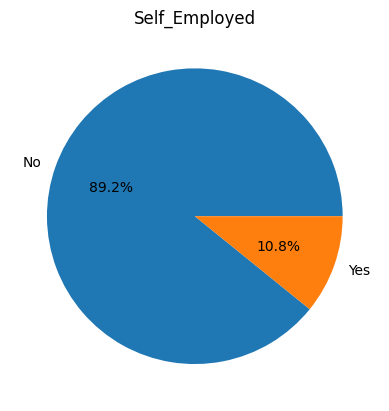

In [66]:
# pie chart for Self_Employed

plt.pie(df['Self_Employed'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title("Self_Employed")


Text(0.5, 1.0, 'ApplicantIncome histogram')

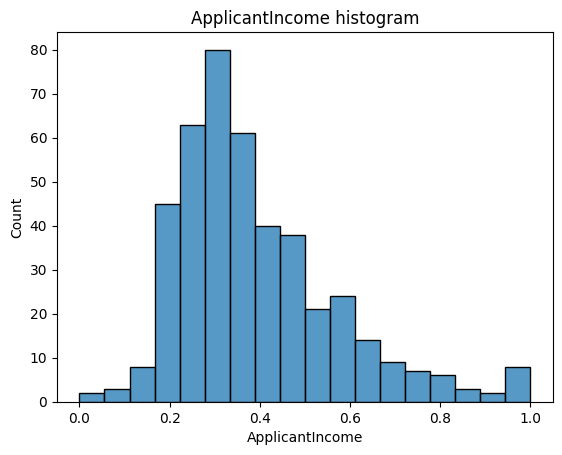

In [67]:

# histogram for ApplicantIncome

sns.histplot(df['ApplicantIncome'])
plt.title("ApplicantIncome histogram")


Text(0.5, 1.0, 'CoapplicantIncome histogram')

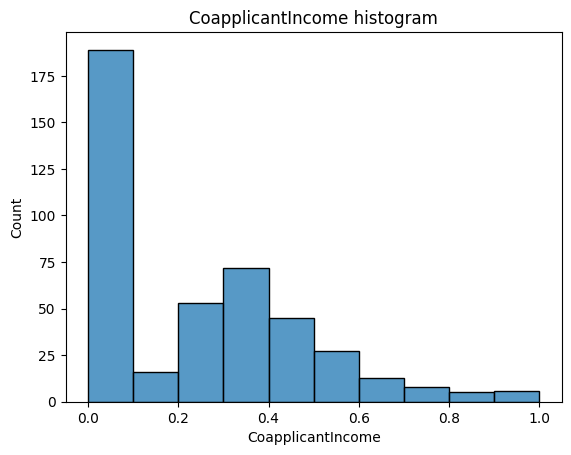

In [68]:

# histogram for CoapplicantIncome

sns.histplot(df['CoapplicantIncome'])
plt.title("CoapplicantIncome histogram")


Text(0.5, 1.0, 'LoanAmount histogram')

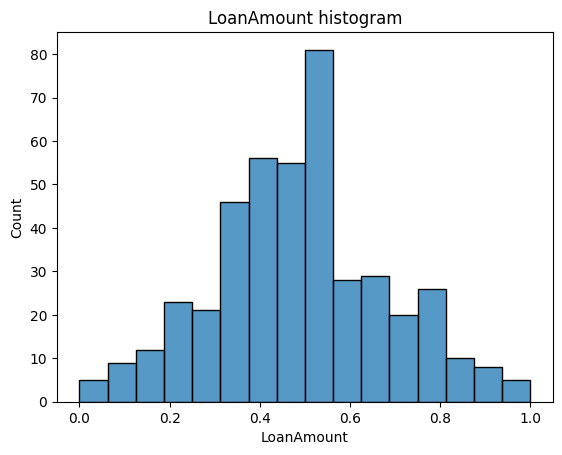

In [69]:

# histogram for LoanAmount

sns.histplot(df['LoanAmount'])
plt.title("LoanAmount histogram")


Text(0.5, 1.0, 'Loan_Amount_Term histogram')

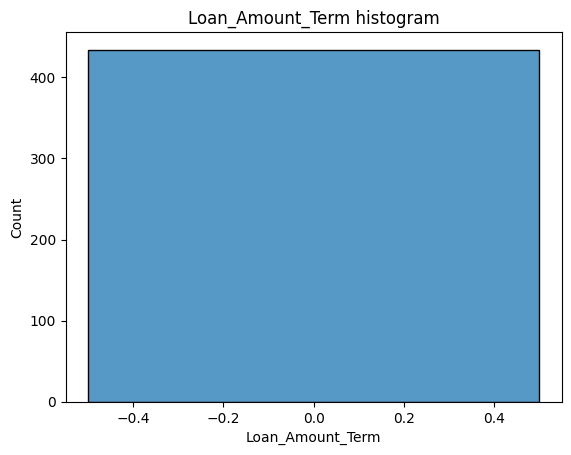

In [70]:

# histogram for Loan_Amount_Term

sns.histplot(df['Loan_Amount_Term'])
plt.title("Loan_Amount_Term histogram")

# All people have same loan amount term, so we can drop this column


In [77]:
# drop Loan_Amount_Term column

df.drop('Loan_Amount_Term', axis=1, inplace=True)


Text(0.5, 1.0, 'Credit_History')

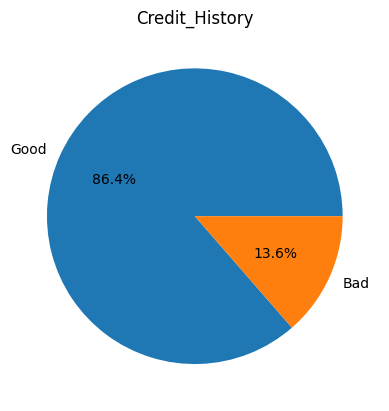

In [78]:

# pie chart for Credit_History

plt.pie(df['Credit_History'].value_counts(), labels=['Good', 'Bad'], autopct='%1.1f%%')
plt.title("Credit_History")


Text(0.5, 1.0, 'property_Area')

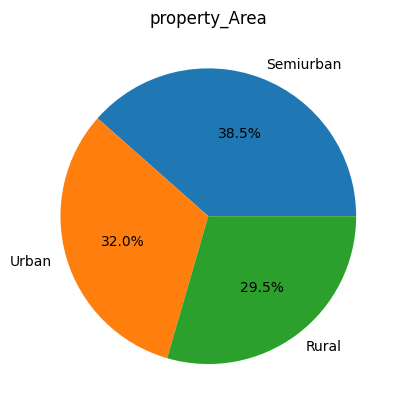

In [79]:

# pie chart for property_Area

plt.pie(df['property_Area'].value_counts(), labels=['Semiurban', 'Urban', 'Rural'], autopct='%1.1f%%')
plt.title("property_Area")


Text(0.5, 1.0, 'Loan_Status')

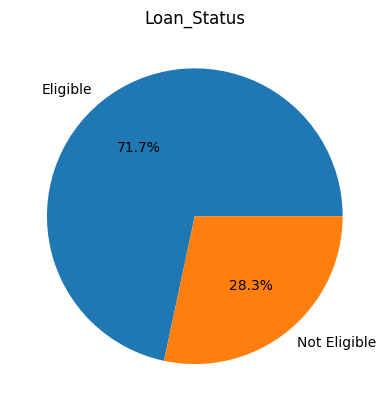

In [80]:

# pie chart for Loan_Status

plt.pie(df['Loan_Status'].value_counts(), labels=['Eligible', 'Not Eligible'], autopct='%1.1f%%')
plt.title("Loan_Status")


In [81]:
# checking for imbalance

print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Credit_History'].value_counts())
print(df['Loan_Status'].value_counts())


1    346
0     88
Name: Gender, dtype: int64
1    275
0    159
Name: Married, dtype: int64
0    330
1    104
Name: Education, dtype: int64
0    387
1     47
Name: Self_Employed, dtype: int64
1.0    375
0.0     59
Name: Credit_History, dtype: int64
1    311
0    123
Name: Loan_Status, dtype: int64


From the above pie charts and value counts, we can see that the data is imbalanced.   
The number of people who are eligible for loan is more than the number of people who are not eligible for loan.   
This is a typical case of imbalanced data.


In [82]:
# using SMOTE to balance data
!pip install imblearn

from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X, y = smote.fit_resample(X, y)

print(X.shape)
print(y.shape)


(622, 10)
(622,)


In [87]:
# print before and after balancing data

print("Number of rows Before Balancing: ", df.shape[0])
print("Number of rows After Balancing: ", X.shape[0])
print("Newly Added rows to balance dataset: ", X.shape[0] - df.shape[0])


Number of rows Before Balancing:  434
Number of rows After Balancing:  622
Newly Added rows to balance dataset:  188


In [88]:
# checking for imbalance again

print(y.value_counts())


1    311
0    311
Name: Loan_Status, dtype: int64


In [101]:
# Checking for skewness in continuous data
continous_data_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
skewness = X[continous_data_columns].skew()
skewness


ApplicantIncome      0.728945
CoapplicantIncome    0.495976
LoanAmount           0.241371
dtype: float64

As we can see in the above data, we have skewed data.

In [102]:
# list of columns with skewness greater than 0.5

skewness = skewness[abs(skewness) > 0.5]
skewed_columns = skewness.keys()
skewed_columns


Index(['ApplicantIncome'], dtype='object')

In [103]:
# applying log transformation to remove skewness

import numpy as np

X[skewed_columns] = np.log1p(X[skewed_columns])
X[continous_data_columns].skew()


ApplicantIncome      0.431102
CoapplicantIncome    0.495976
LoanAmount           0.241371
dtype: float64

In [104]:
# Storing preprocessed data

df = pd.concat([X, y], axis=1)

df.to_csv('data/preprocessed_data.csv', index=False)
